In [10]:
import pandas as pd
HOUSING_PATH="D:\Desktop\housing data"
HOUSING_URL=HOUSING_PATH + "\housing.csv"
def get_and_read_data(housing_url=HOUSING_URL):
    csv_path=housing_url
    return pd.read_csv(csv_path)
housing=get_and_read_data()
#housing.head()
housing.info() #gets a description of the data

    
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing["LotArea"].value_counts()# sample demonstration of one column that returns the total

In [11]:
housing.describe() # returns the description of all numerical attributes

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


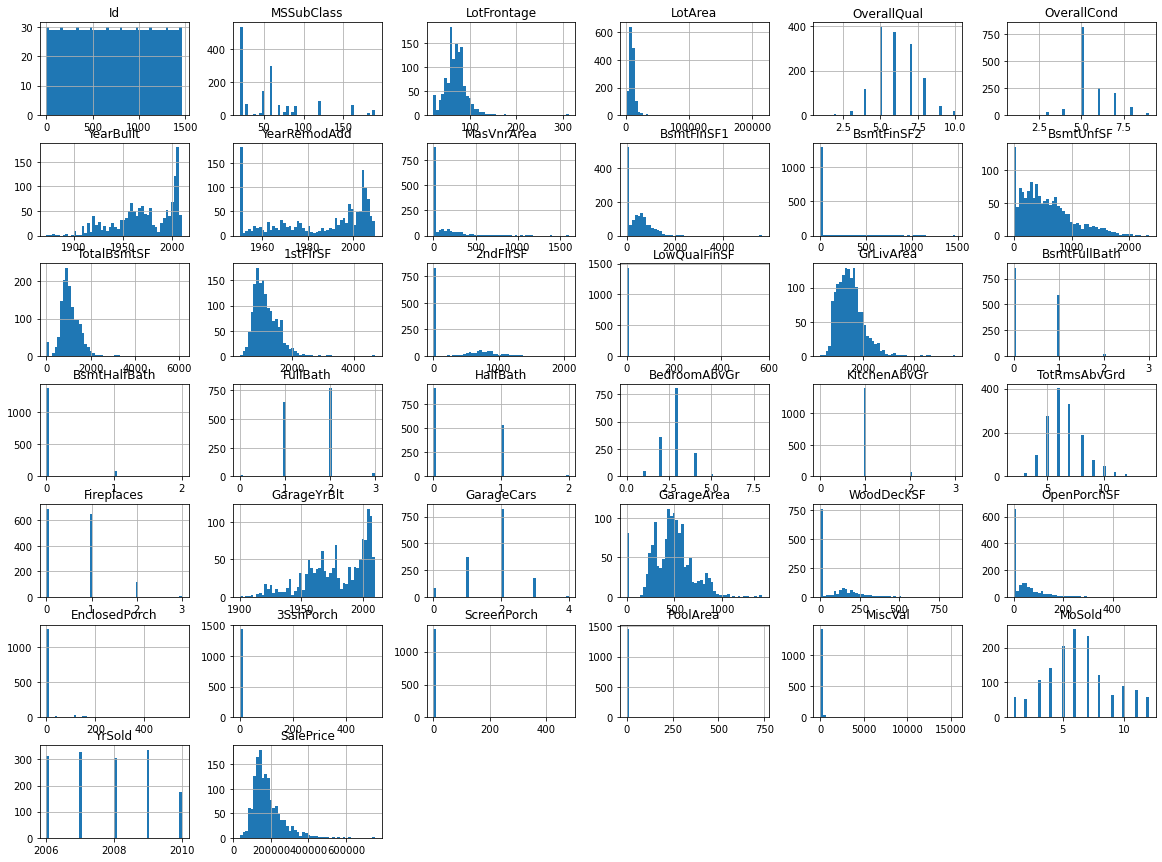

In [13]:
#get visualization of the data
%matplotlib inline # activates the backend of the jupyter notebook to enable the drawing of the graph
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [15]:
#next we are going to split the data into two training and testing set
#we use sklearn because it is easier to use and it has much more flexibility
from sklearn.model_selection import train_test_split
train_set ,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [16]:
#lets try and find the correlated attributes to know which ones are important
correlation=housing.corr()

In [17]:
#we want to know which attributes are closely correlated to the price
correlation["SalePrice"].sort_values(ascending=False)
#we see that the Overall quality and GrLivArea are the positively related to the price of the house

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylab

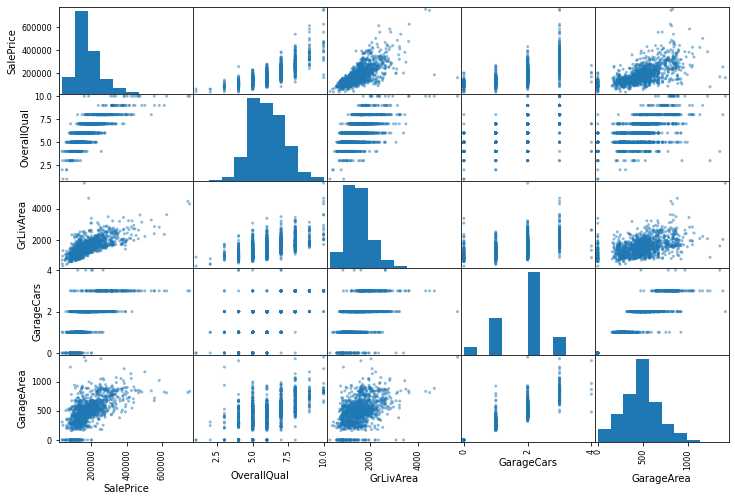

In [21]:
#let's try plotting with Pandas scatter matrix to see the correlations visually of the top 3 correlations
from pandas.plotting import scatter_matrix
attributes=["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

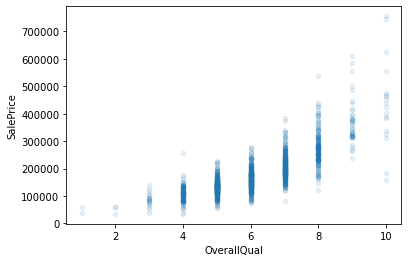

In [23]:
#since we know overall house quality to be the most efficient way to predict saleprice we can zoom in on it
housing.plot(kind="scatter",x="OverallQual",y="SalePrice",alpha=0.1)

In [24]:
#let's remove the column of prices to help understand the model
housing=train_set.drop("SalePrice",axis=1)
housing_labels=train_set["SalePrice"].copy()

In [35]:
#to make the model work efficiently we need to work with empty slots
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")#fill in the values based on the median
#we need to check whether the type is an integer if not we skip and drop it
myhouses=housing.describe()
# for myhouse in myhouses:
#     if isinstance(myhouse,int):
#         imputer.fit(myhouse)
imputer.fit(myhouses)# this will prove that indeed the average has been done

    

    

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([7.31702483e+02, 5.34246575e+01, 7.01719243e+01, 1.01448211e+04,
       6.06078767e+00, 5.29238014e+00, 1.96198288e+03, 1.97544863e+03,
       1.34885972e+02, 4.52547475e+02, 2.25761986e+01, 5.25297517e+02,
       1.02963570e+03, 1.13150000e+03, 3.95960950e+02, 2.84803082e+00,
       1.32050000e+03, 4.72741561e-01, 2.86815068e-02, 1.78852740e+00,
       4.40901180e-01, 2.94520548e+00, 1.00000000e+00, 6.28082192e+00,
       8.22564437e-01, 1.97020607e+03, 1.89083904e+00, 4.79136986e+02,
       1.12816428e+02, 5.95061737e+01, 1.09195205e+01, 1.90625000e+00,
       7.70376712e+00, 1.47773973e+00, 2.56335616e+01, 6.17808219e+00,
       2.00740925e+03])

In [37]:
myhouses.median().values

array([7.31702483e+02, 5.34246575e+01, 7.01719243e+01, 1.01448211e+04,
       6.06078767e+00, 5.29238014e+00, 1.96198288e+03, 1.97544863e+03,
       1.34885972e+02, 4.52547475e+02, 2.25761986e+01, 5.25297517e+02,
       1.02963570e+03, 1.13150000e+03, 3.95960950e+02, 2.84803082e+00,
       1.32050000e+03, 4.72741561e-01, 2.86815068e-02, 1.78852740e+00,
       4.40901180e-01, 2.94520548e+00, 1.00000000e+00, 6.28082192e+00,
       8.22564437e-01, 1.97020607e+03, 1.89083904e+00, 4.79136986e+02,
       1.12816428e+02, 5.95061737e+01, 1.09195205e+01, 1.90625000e+00,
       7.70376712e+00, 1.47773973e+00, 2.56335616e+01, 6.17808219e+00,
       2.00740925e+03])

In [38]:
#now we use the imputer to transform the myhouses dataset
X=imputer.transform(myhouses)